In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exoplanets/exoplanets.csv


In [2]:
##1. Star ID & Planet Name

##kepid → ID number of the star
##kepoi_name → temporary name of the planet
##kepler_name → final official name (only if confirmed)

In [3]:
##2. Planet Status
##CONFIRMED → it is a real planet
##CANDIDATE → maybe a planet
##FALSE POSITIVE → not a planet
##Columns:
##koi_disposition
##koi_pdisposition
##koi_score → how sure NASA is (0 to 1) 

In [4]:
##. Quality Checks (0 or 1)
##These check if the signal (dip in light) really came from a planet:
##koi_fpflag_nt → shape is weird
##koi_fpflag_co → signal is off-center
##koi_fpflag_ec → maybe a binary star
##If the value is:
##0 = looks fine
##1 = problem detected

In [5]:
##4. Star's Physical Details
##Information about the star, not the planet:
##koi_srad → size of the star
##koi_slogg → star's surface gravity
##koi_steff (you have error values) → star temperature
##"err1" or "err2" mean error range.

In [6]:
##5. Star’s Position in the Sky
##ra → like longitude
##dec → like latitude
##This tells where the star is located in the sky.

In [7]:
##6. Brightness
##koi_kepmag → how bright the star looks
##(Big number = dim star)

In [8]:
import pandas as pd

df = pd.read_csv("/kaggle/input/exoplanets/exoplanets.csv")
df.head()


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# data cleaning and eda

In [9]:
df.isnull()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9560,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9561,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9562,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [11]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7205
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9559    False
9560    False
9561    False
9562    False
9563    False
Length: 9564, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe

<bound method NDFrame.describe of          kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3     10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9559  10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9561  10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9563  10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fp

In [15]:
df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [17]:
##how many planets are confirmed ,false,maybe:
df['koi_disposition'].value_counts()


koi_disposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

In [18]:
##visual to know more about the dataset:
##we need to use the matplotlib and seaborn 
##TO visualize the data effectively .
##Insted of this we can use excel ,PowerBI

In [19]:
import matplotlib.pyplot as plt


In [20]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Planet Classification Count =countplot


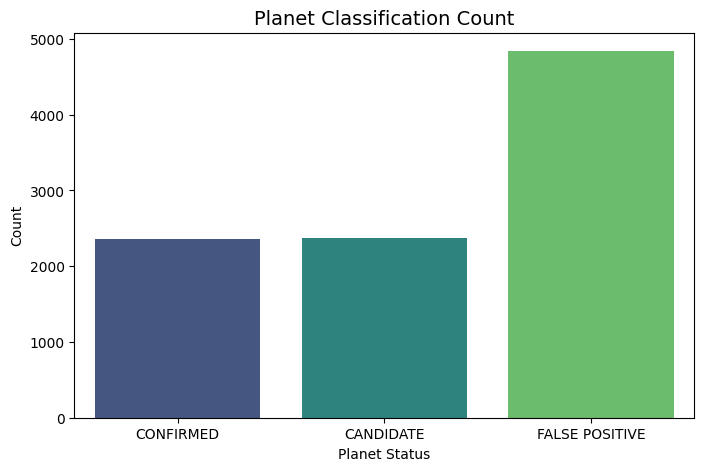

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='koi_disposition', palette='viridis')

plt.title("Planet Classification Count", fontsize=14)
plt.xlabel("Planet Status")
plt.ylabel("Count")
plt.show()


# Star Temperature=histplot


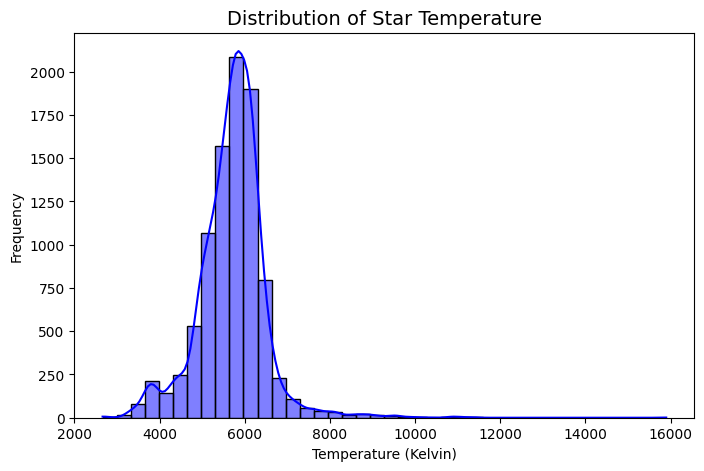

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_steff'], kde=True, bins=40, color='blue')

plt.title("Distribution of Star Temperature", fontsize=14)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Frequency")
plt.show()


# Star Radius vs Star Temperature=scatterplot

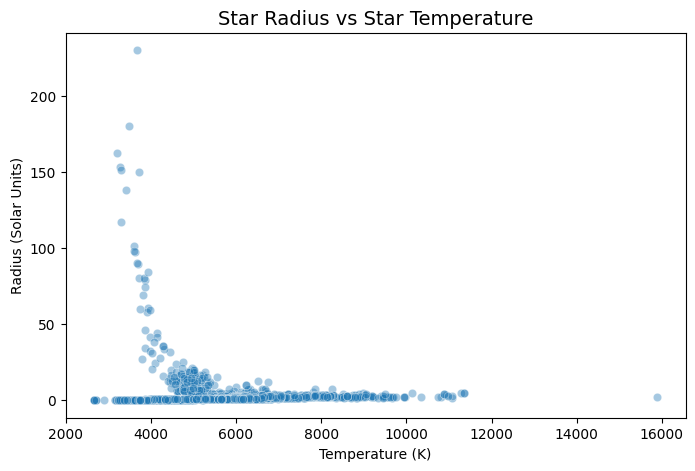

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='koi_steff', y='koi_srad', alpha=0.4)

plt.title("Star Radius vs Star Temperature", fontsize=14)
plt.xlabel("Temperature (K)")
plt.ylabel("Radius (Solar Units)")
plt.show()


# (Brightness)=histplot

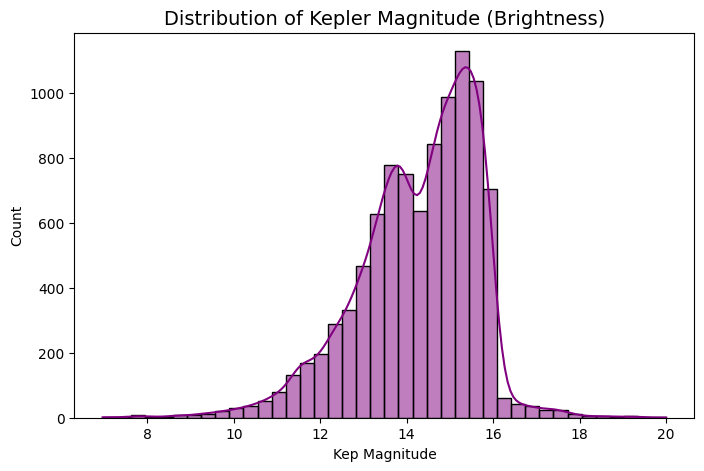

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_kepmag'], kde=True, bins=40, color='purple')

plt.title("Distribution of Kepler Magnitude (Brightness)", fontsize=14)
plt.xlabel("Kep Magnitude")
plt.ylabel("Count")
plt.show()


# KOI Planet Probability Score=histplot

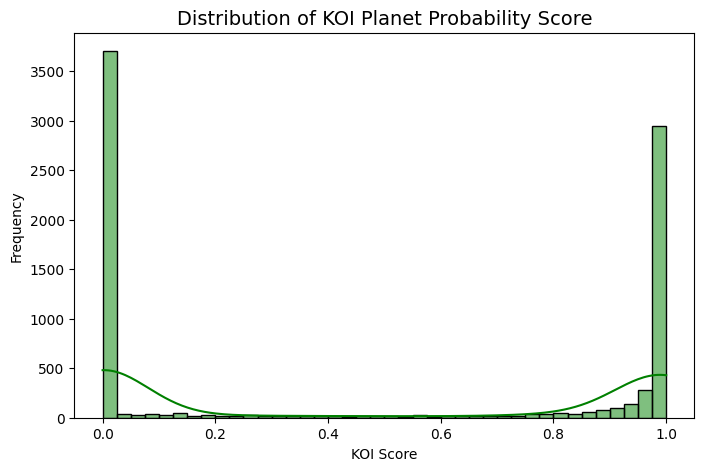

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_score'], kde=True, bins=40, color='green')

plt.title("Distribution of KOI Planet Probability Score", fontsize=14)
plt.xlabel("KOI Score")
plt.ylabel("Frequency")
plt.show()


# features=heatmap 

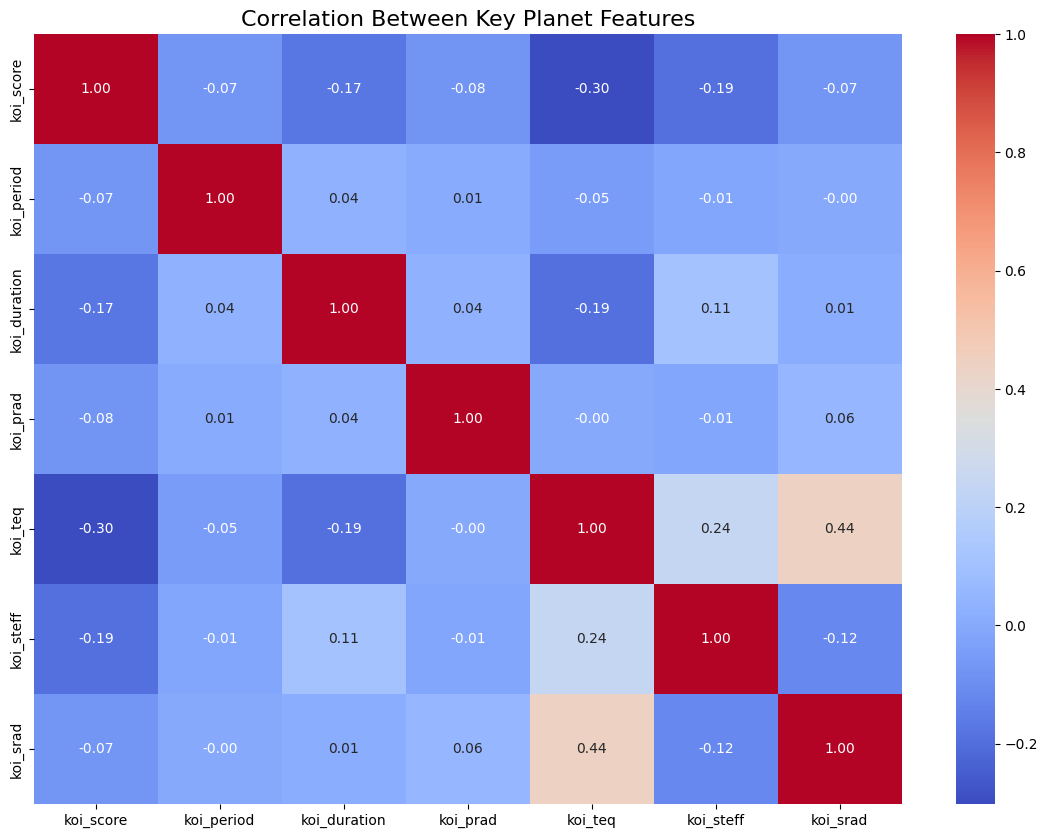

In [26]:
plt.figure(figsize=(14,10))
corr = df[['koi_score','koi_period','koi_duration','koi_prad','koi_teq','koi_steff','koi_srad']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Between Key Planet Features", fontsize=16)
plt.show()


# heatmap for null

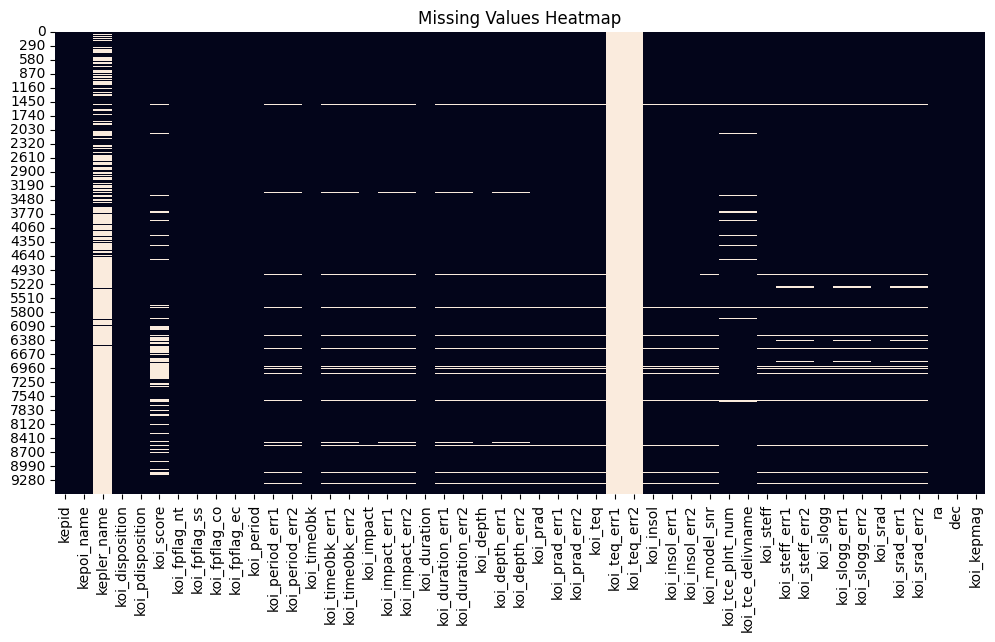

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


# planet radius =heatmap

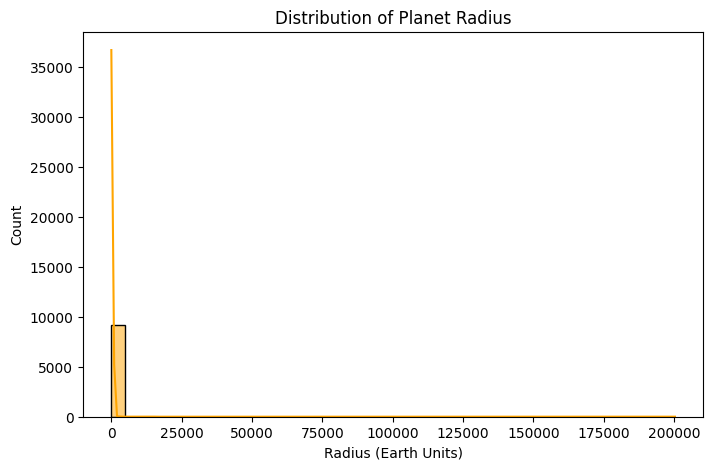

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_prad'], kde=True, bins=40, color='orange')
plt.title("Distribution of Planet Radius")
plt.xlabel("Radius (Earth Units)")
plt.ylabel("Count")
plt.show()


# star temperature=boxplot

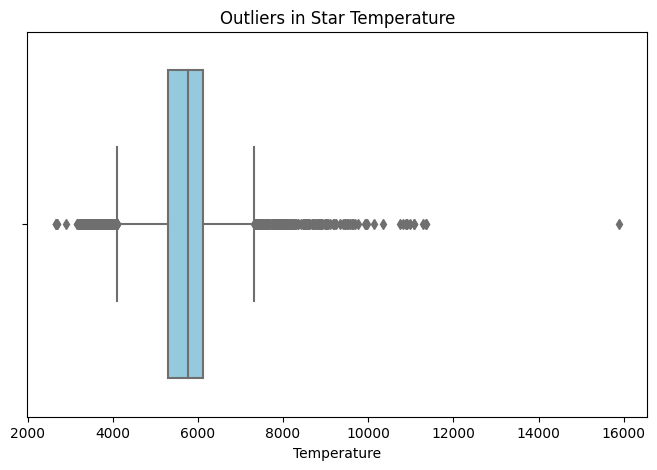

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['koi_steff'], color="skyblue")
plt.title("Outliers in Star Temperature")
plt.xlabel("Temperature")
plt.show()


# pairplot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


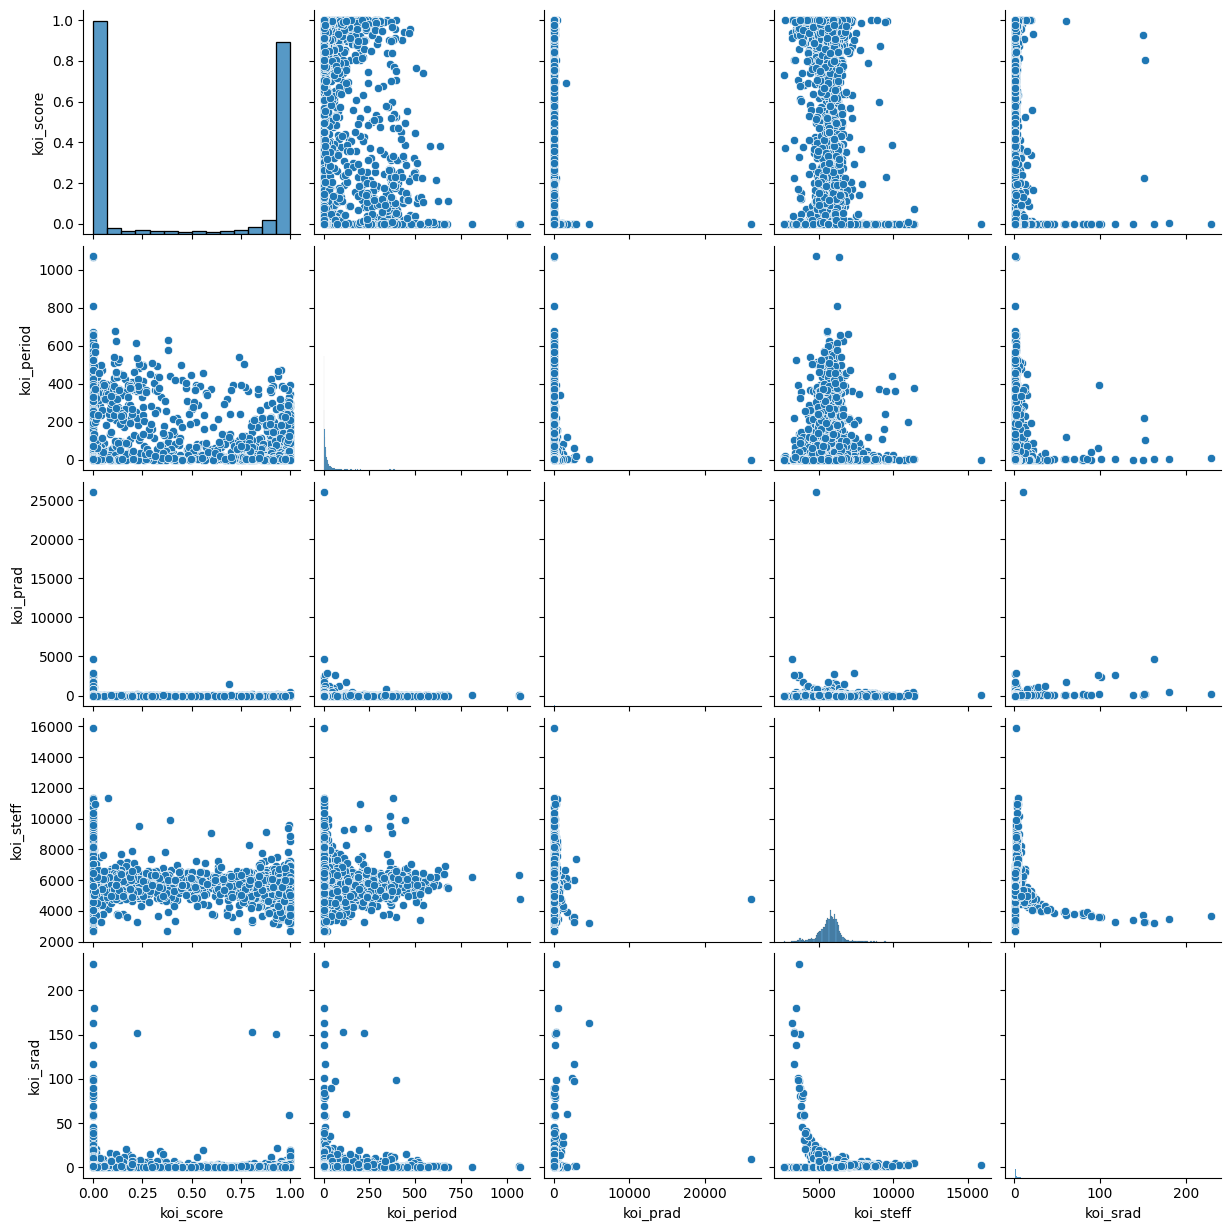

In [30]:
sns.pairplot(df[['koi_score', 'koi_period', 'koi_prad', 'koi_steff', 'koi_srad']].dropna())
plt.show()


# days=histplot

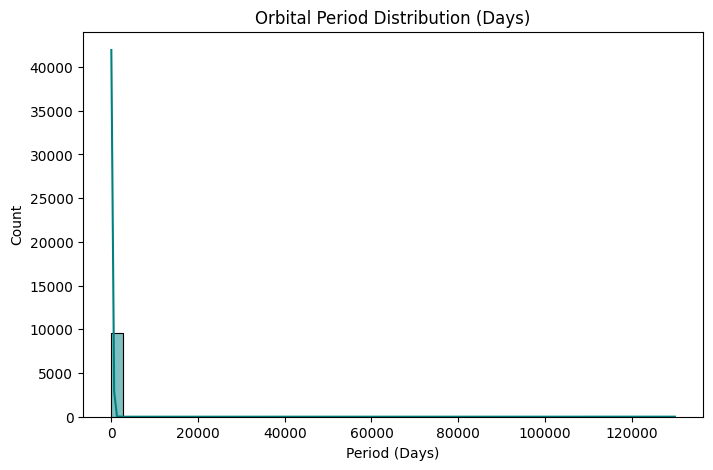

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_period'], bins=50, kde=True, color='teal')
plt.title("Orbital Period Distribution (Days)")
plt.xlabel("Period (Days)")
plt.ylabel("Count")
plt.show()


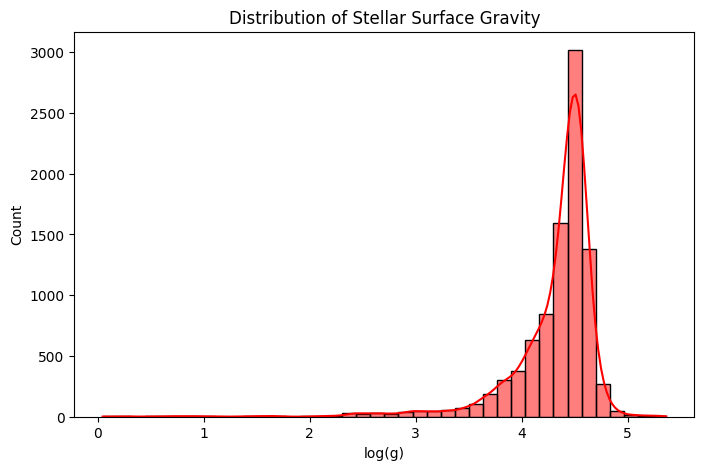

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_slogg'], bins=40, kde=True, color='red')
plt.title("Distribution of Stellar Surface Gravity")
plt.xlabel("log(g)")
plt.ylabel("Count")
plt.show()



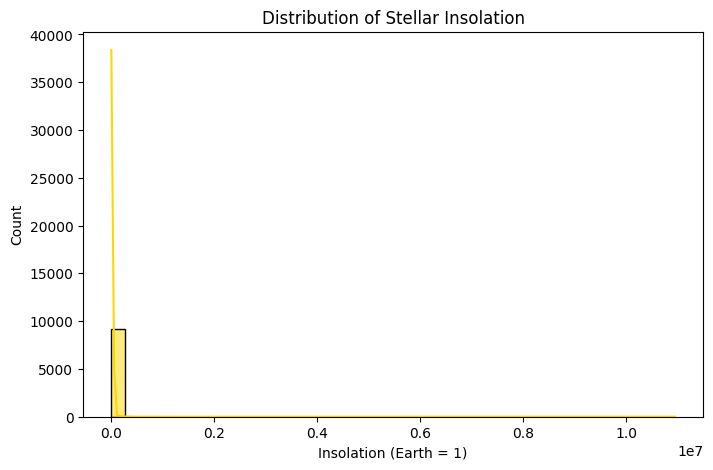

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['koi_insol'], kde=True, bins=40, color='gold')
plt.title("Distribution of Stellar Insolation")
plt.xlabel("Insolation (Earth = 1)")
plt.ylabel("Count")
plt.show()


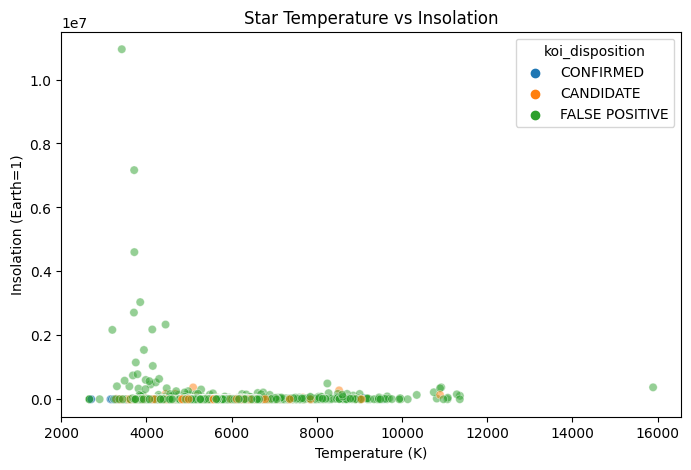

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='koi_steff', y='koi_insol', hue='koi_disposition', alpha=0.5)
plt.title("Star Temperature vs Insolation")
plt.xlabel("Temperature (K)")
plt.ylabel("Insolation (Earth=1)")
plt.show()


In [35]:
df.columns


Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [36]:
df = df.rename(columns={
    'kepid': 'star_id',
    'kepoi_name': 'planet_code',
    'kepler_name': 'planet_name',
    'koi_disposition': 'final_result',
    'koi_pdisposition': 'first_result',
    'koi_score': 'score',
    'koi_fpflag_nt': 'not_transit_flag',
    'koi_fpflag_ss': 'star_shadow_flag',
    'koi_fpflag_co': 'position_error_flag',
    'koi_fpflag_ec': 'timing_error_flag',
    'koi_period': 'orbit_days',
    'koi_period_err1': 'orbit_days_plus',
    'koi_period_err2': 'orbit_days_minus',
    'koi_time0bk': 'transit_time',
    'koi_time0bk_err1': 'transit_time_plus',
    'koi_time0bk_err2': 'transit_time_minus',
    'koi_impact': 'impact',
    'koi_impact_err1': 'impact_plus',
    'koi_impact_err2': 'impact_minus',
    'koi_duration': 'transit_hours',
    'koi_duration_err1': 'transit_hours_plus',
    'koi_duration_err2': 'transit_hours_minus',
    'koi_depth': 'transit_depth',
    'koi_depth_err1': 'transit_depth_plus',
    'koi_depth_err2': 'transit_depth_minus',
    'koi_prad': 'planet_size',
    'koi_prad_err1': 'planet_size_plus',
    'koi_prad_err2': 'planet_size_minus',
    'koi_teq': 'planet_temp',
    'koi_teq_err1': 'planet_temp_plus',
    'koi_teq_err2': 'planet_temp_minus',
    'koi_insol': 'star_energy',
    'koi_insol_err1': 'star_energy_plus',
    'koi_insol_err2': 'star_energy_minus',
    'koi_model_snr': 'signal_strength',
    'koi_tce_plnt_num': 'planet_number',
    'koi_tce_delivname': 'delivery_name',
    'koi_steff': 'star_temp',
    'koi_steff_err1': 'star_temp_plus',
    'koi_steff_err2': 'star_temp_minus',
    'koi_slogg': 'star_gravity',
    'koi_slogg_err1': 'star_gravity_plus',
    'koi_slogg_err2': 'star_gravity_minus',
    'koi_srad': 'star_size',
    'koi_srad_err1': 'star_size_plus',
    'koi_srad_err2': 'star_size_minus',
    'ra': 'right_angle',
    'dec': 'declination',
    'koi_kepmag': 'brightness'
})


In [37]:
df

,star_id,planet_code,planet_name,final_result,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,...,star_temp_minus,star_gravity,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [38]:
df.columns

Index(['star_id', 'planet_code', 'planet_name', 'final_result', 'first_result',
       'score', 'not_transit_flag', 'star_shadow_flag', 'position_error_flag',
       'timing_error_flag', 'orbit_days', 'orbit_days_plus',
       'orbit_days_minus', 'transit_time', 'transit_time_plus',
       'transit_time_minus', 'impact', 'impact_plus', 'impact_minus',
       'transit_hours', 'transit_hours_plus', 'transit_hours_minus',
       'transit_depth', 'transit_depth_plus', 'transit_depth_minus',
       'planet_size', 'planet_size_plus', 'planet_size_minus', 'planet_temp',
       'planet_temp_plus', 'planet_temp_minus', 'star_energy',
       'star_energy_plus', 'star_energy_minus', 'signal_strength',
       'planet_number', 'delivery_name', 'star_temp', 'star_temp_plus',
       'star_temp_minus', 'star_gravity', 'star_gravity_plus',
       'star_gravity_minus', 'star_size', 'star_size_plus', 'star_size_minus',
       'right_angle', 'declination', 'brightness'],
      dtype='object')

In [39]:
df.isnull()

,star_id,planet_code,planet_name,final_result,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,...,star_temp_minus,star_gravity,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9560,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9561,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9562,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

star_id                   0
planet_code               0
planet_name            7205
final_result              0
first_result              0
score                  1510
not_transit_flag          0
star_shadow_flag          0
position_error_flag       0
timing_error_flag         0
orbit_days                0
orbit_days_plus         454
orbit_days_minus        454
transit_time              0
transit_time_plus       454
transit_time_minus      454
impact                  363
impact_plus             454
impact_minus            454
transit_hours             0
transit_hours_plus      454
transit_hours_minus     454
transit_depth           363
transit_depth_plus      454
transit_depth_minus     454
planet_size             363
planet_size_plus        363
planet_size_minus       363
planet_temp             363
planet_temp_plus       9564
planet_temp_minus      9564
star_energy             321
star_energy_plus        321
star_energy_minus       321
signal_strength         363
planet_number       

In [41]:
df

,star_id,planet_code,planet_name,final_result,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,...,star_temp_minus,star_gravity,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


# finding null values


In [42]:
df.isnull().sum()


star_id                   0
planet_code               0
planet_name            7205
final_result              0
first_result              0
score                  1510
not_transit_flag          0
star_shadow_flag          0
position_error_flag       0
timing_error_flag         0
orbit_days                0
orbit_days_plus         454
orbit_days_minus        454
transit_time              0
transit_time_plus       454
transit_time_minus      454
impact                  363
impact_plus             454
impact_minus            454
transit_hours             0
transit_hours_plus      454
transit_hours_minus     454
transit_depth           363
transit_depth_plus      454
transit_depth_minus     454
planet_size             363
planet_size_plus        363
planet_size_minus       363
planet_temp             363
planet_temp_plus       9564
planet_temp_minus      9564
star_energy             321
star_energy_plus        321
star_energy_minus       321
signal_strength         363
planet_number       

1.numerical will contain list of all the numerical columns 
2.the values which are not being present NaN get replaced with the median values


In [43]:
numerical=df.select_dtypes(include=['float64','int64']).columns
df[numerical]=df[numerical].fillna(df[numerical].median())

removing the outliers


In [44]:
df

,star_id,planet_code,planet_name,final_result,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,...,star_temp_minus,star_gravity,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [45]:
df.columns

Index(['star_id', 'planet_code', 'planet_name', 'final_result', 'first_result',
       'score', 'not_transit_flag', 'star_shadow_flag', 'position_error_flag',
       'timing_error_flag', 'orbit_days', 'orbit_days_plus',
       'orbit_days_minus', 'transit_time', 'transit_time_plus',
       'transit_time_minus', 'impact', 'impact_plus', 'impact_minus',
       'transit_hours', 'transit_hours_plus', 'transit_hours_minus',
       'transit_depth', 'transit_depth_plus', 'transit_depth_minus',
       'planet_size', 'planet_size_plus', 'planet_size_minus', 'planet_temp',
       'planet_temp_plus', 'planet_temp_minus', 'star_energy',
       'star_energy_plus', 'star_energy_minus', 'signal_strength',
       'planet_number', 'delivery_name', 'star_temp', 'star_temp_plus',
       'star_temp_minus', 'star_gravity', 'star_gravity_plus',
       'star_gravity_minus', 'star_size', 'star_size_plus', 'star_size_minus',
       'right_angle', 'declination', 'brightness'],
      dtype='object')

# I(InterQuartile)QR method for the outlier detection 

In [46]:
cols=['planet_size','planet_temp','star_temp','star_energy','star_gravity','star_size','brightness']
for col in cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[col]>=Q1-1.5*IQR)&(df[col]<=Q3+1.5*IQR)]



converting in the numbers:


# use one hot encoding

drop first means that doesn't what new columns

In [47]:
df = pd.get_dummies(df, columns=['final_result'], drop_first=True)


In [48]:
df

,star_id,planet_code,planet_name,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,orbit_days,...,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness,final_result_CONFIRMED,final_result_FALSE POSITIVE
0,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,9.488036,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True,False
1,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,54.418383,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True,False
2,10811496,K00753.01,NaN,CANDIDATE,0.000,0,0,0,0,19.899140,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,False,False
4,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,2.525592,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,True,False
5,10872983,K00756.01,Kepler-228 d,CANDIDATE,1.000,0,0,0,0,11.094321,...,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,10079481,K08195.01,NaN,FALSE POSITIVE,0.000,1,0,0,0,330.808790,...,0.096,-0.144,1.066,0.222,-0.148,293.56528,47.093620,11.976,False,True
9556,10199817,K08197.01,NaN,FALSE POSITIVE,0.053,1,0,0,0,392.942470,...,0.385,-0.165,1.440,0.353,-0.529,288.39456,47.264351,12.152,False,True
9557,10205598,K08198.01,NaN,FALSE POSITIVE,0.008,1,0,0,0,373.893980,...,0.078,-0.052,0.699,0.074,-0.066,290.93597,47.290730,14.911,False,True
9558,10031643,K07984.01,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,...,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,False,True


In [49]:
#feature engineering:
##I am going to have a feature engineering over the habitability that  hwo much a planet is stable fo rhte leaving 
## And i will also have a feature engineer over the star that how much they are stable

In [50]:
df

,star_id,planet_code,planet_name,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,orbit_days,...,star_gravity_plus,star_gravity_minus,star_size,star_size_plus,star_size_minus,right_angle,declination,brightness,final_result_CONFIRMED,final_result_FALSE POSITIVE
0,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,9.488036,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True,False
1,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,54.418383,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True,False
2,10811496,K00753.01,NaN,CANDIDATE,0.000,0,0,0,0,19.899140,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,False,False
4,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,2.525592,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,True,False
5,10872983,K00756.01,Kepler-228 d,CANDIDATE,1.000,0,0,0,0,11.094321,...,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,10079481,K08195.01,NaN,FALSE POSITIVE,0.000,1,0,0,0,330.808790,...,0.096,-0.144,1.066,0.222,-0.148,293.56528,47.093620,11.976,False,True
9556,10199817,K08197.01,NaN,FALSE POSITIVE,0.053,1,0,0,0,392.942470,...,0.385,-0.165,1.440,0.353,-0.529,288.39456,47.264351,12.152,False,True
9557,10205598,K08198.01,NaN,FALSE POSITIVE,0.008,1,0,0,0,373.893980,...,0.078,-0.052,0.699,0.074,-0.066,290.93597,47.290730,14.911,False,True
9558,10031643,K07984.01,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,...,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,False,True


scaling everything on the same scales :
what does this function does:
this function basically does substract the mean and making the mean zero  and divides by the standard deviation  and making it one.this whole process is called as the z-score normalization .
what else you can use :

we can use the 
1.min max scaling 
2.robustscaler
3.maxabsscaler
4. normalizer
5.PCA(Principle Component Analysis)


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['planet_temp_z', 'planet_size_z', 'star_temp_z', 'star_energy_z']] = scaler.fit_transform(
    df[['planet_temp', 'planet_size', 'star_temp', 'star_energy']]
)


find correlation :correlation tells us that which feature actually matters for our prediction and which does not matter.
Insted of this we can use the Random forest and XGBoost


In [52]:
features = [
    'planet_temp_z',
    'planet_size_z',
    'star_temp_z',
    'star_energy_z',
    'star_gravity_z',
    'star_size_z',
    'orbit_days'
]


In [53]:
df.columns

Index(['star_id', 'planet_code', 'planet_name', 'first_result', 'score',
       'not_transit_flag', 'star_shadow_flag', 'position_error_flag',
       'timing_error_flag', 'orbit_days', 'orbit_days_plus',
       'orbit_days_minus', 'transit_time', 'transit_time_plus',
       'transit_time_minus', 'impact', 'impact_plus', 'impact_minus',
       'transit_hours', 'transit_hours_plus', 'transit_hours_minus',
       'transit_depth', 'transit_depth_plus', 'transit_depth_minus',
       'planet_size', 'planet_size_plus', 'planet_size_minus', 'planet_temp',
       'planet_temp_plus', 'planet_temp_minus', 'star_energy',
       'star_energy_plus', 'star_energy_minus', 'signal_strength',
       'planet_number', 'delivery_name', 'star_temp', 'star_temp_plus',
       'star_temp_minus', 'star_gravity', 'star_gravity_plus',
       'star_gravity_minus', 'star_size', 'star_size_plus', 'star_size_minus',
       'right_angle', 'declination', 'brightness', 'final_result_CONFIRMED',
       'final_result_FALS

this logisitic regression is used to basically find out planet is livable or not It learns from the data:
What temperature confirmed planets have
What size they usually are
What kind of star they orbit
How much energy they get
The computer finds patterns in these planets.
what else can we use:
1.random forest
2.XG-BOOST
3.SVM


In [54]:
from sklearn.linear_model import LogisticRegression
X = df[['planet_temp_z','planet_size_z','star_temp_z','star_energy_z']]
y = df['final_result_CONFIRMED']
model = LogisticRegression()
model.fit(X, y)
df['HSI'] = model.predict_proba(X)[:,1]


In [55]:
df.columns

Index(['star_id', 'planet_code', 'planet_name', 'first_result', 'score',
       'not_transit_flag', 'star_shadow_flag', 'position_error_flag',
       'timing_error_flag', 'orbit_days', 'orbit_days_plus',
       'orbit_days_minus', 'transit_time', 'transit_time_plus',
       'transit_time_minus', 'impact', 'impact_plus', 'impact_minus',
       'transit_hours', 'transit_hours_plus', 'transit_hours_minus',
       'transit_depth', 'transit_depth_plus', 'transit_depth_minus',
       'planet_size', 'planet_size_plus', 'planet_size_minus', 'planet_temp',
       'planet_temp_plus', 'planet_temp_minus', 'star_energy',
       'star_energy_plus', 'star_energy_minus', 'signal_strength',
       'planet_number', 'delivery_name', 'star_temp', 'star_temp_plus',
       'star_temp_minus', 'star_gravity', 'star_gravity_plus',
       'star_gravity_minus', 'star_size', 'star_size_plus', 'star_size_minus',
       'right_angle', 'declination', 'brightness', 'final_result_CONFIRMED',
       'final_result_FALS

# scaling star feature also 


In [56]:

df[['star_temp_z','star_gravity_z','star_size_z']] = scaler.fit_transform(
    df[['star_temp','star_gravity','star_size']]
)

In [57]:
X_star = df[['star_temp_z', 'star_gravity_z', 'star_size_z']]
y_star = df['final_result_CONFIRMED']

applying logistic regression again 

In [58]:
from sklearn.linear_model import LogisticRegression
model_sci = LogisticRegression()
model_sci.fit(X_star, y_star)

LogisticRegression()

In [59]:
df['SCI'] = model_sci.predict_proba(X_star)[:,1]

combining all together

In [60]:
df['HSI_final'] = (df['HSI'] + df['HSI'] + df['SCI']) / 3


In [61]:
df['HSI_final']

0       0.423368
1       0.328831
2       0.192958
4       0.213886
5       0.321801
          ...   
9554    0.214111
9556    0.253992
9557    0.226489
9558    0.449188
9563    0.276496
Name: HSI_final, Length: 5308, dtype: float64

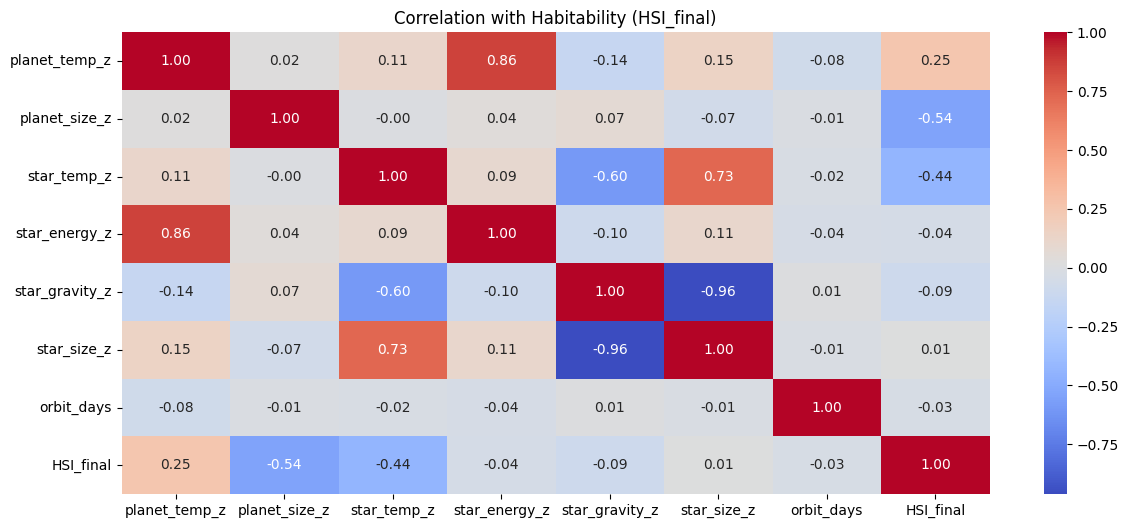

In [62]:
# Correlation analysis with final habitability score
corr_df = df[features + ['HSI_final']].corr()

plt.figure(figsize=(14,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Habitability (HSI_final)")
plt.show()


# train the model::


In [63]:
df

,star_id,planet_code,planet_name,first_result,score,not_transit_flag,star_shadow_flag,position_error_flag,timing_error_flag,orbit_days,...,final_result_FALSE POSITIVE,planet_temp_z,planet_size_z,star_temp_z,star_energy_z,HSI,star_gravity_z,star_size_z,SCI,HSI_final
0,10797460,K00752.01,Kepler-227 b,CANDIDATE,1.000,0,0,0,0,9.488036,...,False,0.158219,-0.294599,-0.344369,-0.318894,0.451603,0.030870,-0.112661,0.366899,0.423368
1,10797460,K00752.02,Kepler-227 c,CANDIDATE,0.969,0,0,0,0,54.418383,...,False,-0.903104,-0.199170,-0.344369,-0.689561,0.309797,0.030870,-0.112661,0.366899,0.328831
2,10811496,K00753.01,NaN,CANDIDATE,0.000,0,0,0,0,19.899140,...,False,-0.311796,1.771369,0.448794,-0.557098,0.184677,0.648201,-0.413049,0.209518,0.192958
4,10854555,K00755.01,Kepler-664 b,CANDIDATE,1.000,0,0,0,0,2.525592,...,False,2.017050,-0.212563,0.803525,3.334119,0.174741,-0.201631,0.493206,0.292175,0.213886
5,10872983,K00756.01,Kepler-228 d,CANDIDATE,1.000,0,0,0,0,11.094321,...,False,0.285577,-0.020030,0.833418,-0.225788,0.367278,0.183198,0.116448,0.230847,0.321801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,10079481,K08195.01,NaN,FALSE POSITIVE,0.000,1,0,0,0,330.808790,...,True,-1.367054,-0.316364,1.056619,-0.722205,0.198297,-0.650599,0.595033,0.245740,0.214111
9556,10199817,K08197.01,NaN,FALSE POSITIVE,0.053,1,0,0,0,392.942470,...,True,-1.194210,-0.405097,1.929497,-0.714483,0.193973,-3.127940,2.499187,0.374031,0.253992
9557,10205598,K08198.01,NaN,FALSE POSITIVE,0.008,1,0,0,0,373.893980,...,True,-1.621772,-0.252744,-0.727000,-0.727690,0.227943,0.888719,-1.273483,0.223580,0.226489
9558,10031643,K07984.01,NaN,FALSE POSITIVE,0.000,0,0,0,1,8.589871,...,True,0.570619,-0.487133,0.020326,0.044446,0.469804,-1.340086,0.707042,0.407955,0.449188


In [64]:
y = (df['HSI_final'] >= 0.4).astype(int)

In [65]:
X = df[
    [
        'planet_temp_z',
        'planet_size_z',
        'star_temp_z',
        'star_energy_z',
        'star_gravity_z',
        'star_size_z',
        'orbit_days'
    ]
]

now train and test split the data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# logistic regression 

In [68]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report ,accuracy_score

In [69]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [70]:
pred=model.predict(X_test)

In [71]:
accuracy_score(y_test,pred)

0.981638418079096

In [72]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1601\n           1       1.00      0.93      0.96       523\n\n    accuracy                           0.98      2124\n   macro avg       0.99      0.96      0.97      2124\nweighted avg       0.98      0.98      0.98      2124\n'

# K nearest neighbours

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)



In [75]:
accuracy_score(y_test,knn_pred)

0.9265536723163842

In [76]:
classification_report(y_test,knn_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95      1601\n           1       0.87      0.83      0.85       523\n\n    accuracy                           0.93      2124\n   macro avg       0.91      0.89      0.90      2124\nweighted avg       0.93      0.93      0.93      2124\n'

# SVM(Support Vector Machine)

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)

In [79]:
proba = svm.predict_proba(X_test_scaled)[:, 1]
svm_pred = (proba >= 0.3).astype(int)

In [80]:
accuracy_score(y_test, svm_pred)

0.9637476459510358

In [81]:
classification_report(y_test, svm_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98      1601\n           1       0.91      0.95      0.93       523\n\n    accuracy                           0.96      2124\n   macro avg       0.94      0.96      0.95      2124\nweighted avg       0.96      0.96      0.96      2124\n'

In [82]:
#Naive Bayes::


# Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
from sklearn.metrics import accuracy_score,classification_report

In [85]:
nb=GaussianNB()
nb.fit(X_train,y_train)
pred=nb.predict(X_test)


In [86]:
accuracy_score(y_test,pred)

0.6125235404896422

In [87]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.49      0.66      1601\n           1       0.39      0.99      0.56       523\n\n    accuracy                           0.61      2124\n   macro avg       0.69      0.74      0.61      2124\nweighted avg       0.84      0.61      0.63      2124\n'

In [88]:
##Decision Tree

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt.fit(X_train,y_train)
pred=dt.predict(X_test)


In [90]:
accuracy_score(y_test,pred)


0.8860640301318268

In [91]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.93      1601\n           1       0.78      0.74      0.76       523\n\n    accuracy                           0.89      2124\n   macro avg       0.85      0.84      0.84      2124\nweighted avg       0.88      0.89      0.88      2124\n'

# Random forest::

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf=RandomForestClassifier(
    n_estimators=200,
    random_state=42
    
)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)


In [94]:
accuracy_score(y_test,pred)

0.9486817325800376

In [95]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97      1601\n           1       0.93      0.86      0.89       523\n\n    accuracy                           0.95      2124\n   macro avg       0.94      0.92      0.93      2124\nweighted avg       0.95      0.95      0.95      2124\n'

In [96]:
##XG-BOOST:: 

# XG-BOOST::

In [97]:
from xgboost import XGBClassifier


In [98]:
xgb=XGBClassifier(

    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)



In [99]:
xgb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [100]:
xgb_pred=xgb.predict(X_test)


In [101]:
accuracy_score(y_test,xgb_pred)


0.96045197740113

In [102]:
classification_report(y_test,xgb_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      1601\n           1       0.93      0.90      0.92       523\n\n    accuracy                           0.96      2124\n   macro avg       0.95      0.94      0.95      2124\nweighted avg       0.96      0.96      0.96      2124\n'

Accuracy

# Accuracy

In [103]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, xgb_pred)
accuracy


0.96045197740113

# Precision, Recall, F1-score

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1601
           1       0.93      0.90      0.92       523

    accuracy                           0.96      2124
   macro avg       0.95      0.94      0.95      2124
weighted avg       0.96      0.96      0.96      2124



# ROC-AUC Score

In [105]:
from sklearn.metrics import roc_auc_score
xgb_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, xgb_prob)
roc_auc


0.9986767352622584

# RANK EXOPLANETS BASED ON HABITABILITY SCORES

In [106]:
df['habitability_score'] = model.predict_proba(X)[:, 1]

In [107]:
ranked_planets = df.sort_values(
    by='habitability_score',
    ascending=False
)
ranked_planets[['planet_name', 'habitability_score']].head(10)


,planet_name,habitability_score
4077,NaN,1.000000
3916,NaN,0.999999
8427,NaN,0.999998
8401,NaN,0.999998
2870,NaN,0.999998
7883,NaN,0.999998
8320,NaN,0.999998
3269,NaN,0.999998
2192,NaN,0.999997
2340,Kepler-1367 b,0.999997
